#Session 49. Classification model for text dataset


# Read dataset

In [188]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/Tweets.csv', delimiter=',')
#df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/IMDB_small_size.csv', delimiter=',')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [189]:
df.shape

(14640, 15)

## resize dataset

In [190]:
df_resize = df.iloc[:1000]
df_resize.shape

(1000, 15)

## Remove neutral

In [191]:
df_resize = df_resize[df_resize.airline_sentiment	 != 'neutral']

In [192]:
df_resize.shape

(728, 15)

In [193]:
df_resize.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


## tokenization

In [194]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()

list_tokens = list()
for line in lines:
  line = line.replace("@VirginAmerica","")
  line = line.replace("@united","")
  tokens = word_tokenize(line)
  list_tokens.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [200]:
list_tokens[10]

['Thanks', '!']

## tokenization, removing stopwords, stemming

In [198]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()
list_tokens_stem = list()
porter = PorterStemmer()

for line in lines:
  line = line.replace("@VirginAmerica","")
  line = line.replace("@united","")
  tokens = word_tokenize(line)
  # merubah tokens menjadi huruf kecil semua
  tokens = [w.lower() for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  # menghapus stop words
  tokens = [word for word in tokens if not word in stopwords.words()]
  # melakukan stemming
  tokens = [porter.stem(word) for word in tokens]
  list_tokens_stem.append(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [201]:
print(lines[10])
print(list_tokens_stem[10])


@VirginAmerica Thanks!
['thank']


## removing stopword + lemmatization

In [202]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()
list_tokens_lemma = list()
#porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

for line in lines:
  line = line.replace("@VirginAmerica","")
  line = line.replace("@united","")
  tokens = word_tokenize(line)
  # merubah tokens menjadi huruf kecil semua
  tokens = [w.lower() for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  # menghapus stop words
  tokens = [word for word in tokens if not word in stopwords.words()]
  # melakukan stemming
  #tokens = [porter.stem(word) for word in tokens]
  # melakukan lemmatization
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  list_tokens_lemma.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [204]:
list_tokens_lemma[10]

['thanks']

# Feature Extraction

## bag of words

In [205]:
from sklearn.feature_extraction.text import CountVectorizer

new_doc = list()
#ambil dari hasil lemmatization misalnya
for doc in list_tokens_lemma:
  row = ' '.join(doc)
  new_doc.append(row)

vectorizer = CountVectorizer(max_features=1000)
X_input_bow = vectorizer.fit_transform(new_doc)

In [217]:
list_tokens_lemma[:10]

[['plus', 'added', 'commercial', 'experience', 'tacky'],
 ['really',
  'aggressive',
  'blast',
  'obnoxious',
  'entertainment',
  'guest',
  'face',
  'amp',
  'little',
  'recourse'],
 ['really', 'big', 'bad', 'thing'],
 ['seriously',
  'would',
  'pay',
  'flight',
  'seat',
  'playing',
  'really',
  'bad',
  'thing',
  'flying'],
 ['yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'go', 'away'],
 ['virginamerica', 'well'],
 ['amazing', 'arrived', 'hour', 'early', 'good'],
 ['lt', 'pretty', 'graphic', 'much', 'better', 'minimal', 'iconography'],
 ['great',
  'deal',
  'already',
  'thinking',
  'trip',
  'australia',
  'amp',
  'even',
  'gone',
  'trip',
  'yet',
  'p'],
 ['virginmedia',
  'flying',
  'fabulous',
  'seductive',
  'sky',
  'stress',
  'away',
  'travel',
  'http']]

In [143]:
new_doc[:10]

['plus added commercial experience tacky',
 'really aggressive blast obnoxious entertainment guest face amp little recourse',
 'really big bad thing',
 'seriously would pay flight seat playing really bad thing flying',
 'yes nearly every time fly vx ear worm go away',
 'virginamerica well',
 'amazing arrived hour early good',
 'lt pretty graphic much better minimal iconography',
 'great deal already thinking trip australia amp even gone trip yet p',
 'virginmedia flying fabulous seductive sky stress away travel http']

In [206]:
print(vectorizer.get_feature_names())
print(X_input_bow.toarray())
print(vectorizer.vocabulary_)
print(X_input_bow.shape)


['able', 'absolute', 'access', 'account', 'actually', 'add', 'added', 'adding', 'additional', 'address', 'advance', 'afford', 'agent', 'ago', 'ahead', 'air', 'aircraft', 'airline', 'airport', 'already', 'always', 'amazing', 'america', 'americanair', 'amp', 'angry', 'another', 'answer', 'answering', 'anxiety', 'anyone', 'anything', 'anyway', 'anywhere', 'apology', 'app', 'apparently', 'applied', 'appreciate', 'appropriate', 'around', 'arrived', 'arrives', 'arriving', 'asap', 'ase', 'ask', 'asked', 'asking', 'assist', 'assistance', 'atrocious', 'attendant', 'austin', 'avail', 'available', 'aviv', 'award', 'away', 'awesome', 'back', 'bad', 'bag', 'baggage', 'bank', 'bday', 'behind', 'best', 'better', 'big', 'bin', 'birthday', 'bit', 'board', 'boarded', 'boarding', 'book', 'booked', 'booking', 'bos', 'boston', 'bought', 'brand', 'break', 'broken', 'browser', 'bug', 'business', 'button', 'buy', 'cabin', 'cake', 'call', 'called', 'calling', 'came', 'cancelled', 'cant', 'captain', 'car', 'car

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## TF-IDF

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer
new_doc = list()
# ambil dari hasil lemmatization misalnya
for doc in list_tokens_lemma:
  row = ' '.join(doc)
  new_doc.append(row)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_input_tfidf = tfidf_vectorizer.fit_transform(new_doc)

In [208]:
print(tfidf_vectorizer.get_feature_names())
print(X_input_tfidf.toarray())
print(tfidf_vectorizer.vocabulary_)
print(X_input_tfidf.shape)

['able', 'absolute', 'access', 'account', 'actually', 'add', 'added', 'adding', 'additional', 'address', 'advance', 'afford', 'agent', 'ago', 'ahead', 'air', 'aircraft', 'airline', 'airport', 'already', 'always', 'amazing', 'america', 'americanair', 'amp', 'angry', 'another', 'answer', 'answering', 'anxiety', 'anyone', 'anything', 'anyway', 'anywhere', 'apology', 'app', 'apparently', 'applied', 'appreciate', 'appropriate', 'around', 'arrived', 'arrives', 'arriving', 'asap', 'ase', 'ask', 'asked', 'asking', 'assist', 'assistance', 'atrocious', 'attendant', 'austin', 'avail', 'available', 'aviv', 'award', 'away', 'awesome', 'back', 'bad', 'bag', 'baggage', 'bank', 'bday', 'behind', 'best', 'better', 'big', 'bin', 'birthday', 'bit', 'board', 'boarded', 'boarding', 'book', 'booked', 'booking', 'bos', 'boston', 'bought', 'brand', 'break', 'broken', 'browser', 'bug', 'business', 'button', 'buy', 'cabin', 'cake', 'call', 'called', 'calling', 'came', 'cancelled', 'cant', 'captain', 'car', 'car

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Classification models

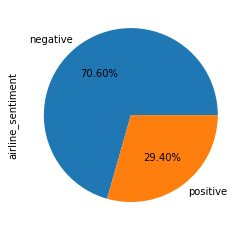

In [210]:
import matplotlib.pyplot as plt

data = df_resize['airline_sentiment'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

## MLP + BOW

Accuracy  0.8401826484018264
Precision  0.8121184371184371
Recall  0.8037730243612597
Confusion matrix  [[137  16]
 [ 19  47]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


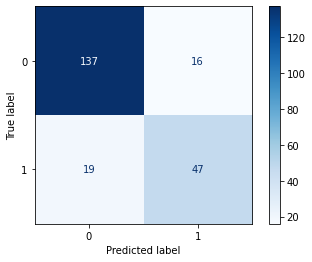

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier


# get X and y
df_X = X_input_bow
df_y = df_resize['airline_sentiment']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)

#mulai learning 
model=MLPClassifier(max_iter=1000)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [212]:
df_X.shape

(728, 1000)

## MLP + TFIDF

Accuracy  0.8538812785388128
Precision  0.7931034482758621
Recall  0.696969696969697
Confusion matrix  [[141  12]
 [ 20  46]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


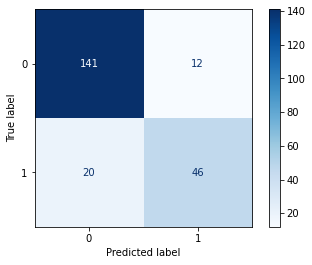

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier


# get X and y
df_X = X_input_tfidf
df_y = df_resize['airline_sentiment']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)

#mulai learning 
model=MLPClassifier(max_iter=1000)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## DT + BOW

Accuracy  0.726027397260274
Precision  0.5319148936170213
Recall  0.7575757575757576
Confusion matrix  [[109  44]
 [ 16  50]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


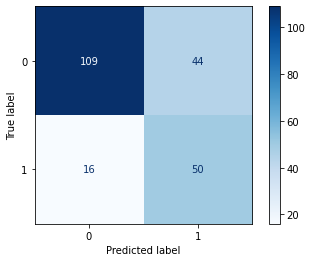

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier


# get X and y
df_X = X_input_bow
df_y = df_resize['airline_sentiment']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)


#mulai learning 
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## DT + TFIDF

Accuracy  0.7123287671232876
Precision  0.5154639175257731
Recall  0.7575757575757576
Confusion matrix  [[106  47]
 [ 16  50]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


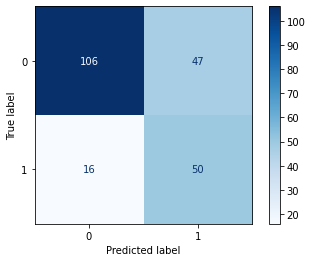

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier


# get X and y
df_X = X_input_tfidf
df_y = df_resize['airline_sentiment']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)


#mulai learning 
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Word Cloud

graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text

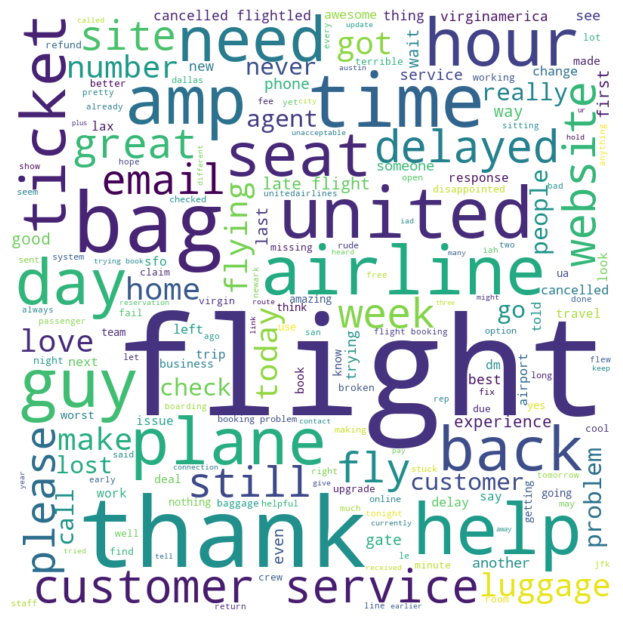

In [219]:
from wordcloud import WordCloud

text = ' '.join(new_doc)
wordcloud = WordCloud(width = 800, height = 800, background_color="white")
wordcloud = wordcloud.generate_from_text(text)
# Display the generated image:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [218]:
text

'plus added commercial experience tacky really aggressive blast obnoxious entertainment guest face amp little recourse really big bad thing seriously would pay flight seat playing really bad thing flying yes nearly every time fly vx ear worm go away virginamerica well amazing arrived hour early good lt pretty graphic much better minimal iconography great deal already thinking trip australia amp even gone trip yet p virginmedia flying fabulous seductive sky stress away travel http thanks schedule still excited first cross country flight lax mco heard nothing great thing virgin america flew nyc sfo last week could fully seat due two large gentleman either side help flying know would amazingly awesome please fly first fare may three time carrier seat available select love graphic http love hipster innovation feel good brand guy messed reserved seating friend guy gave seat away free internet status match program applied three week called emailed response happened ur vegan food option least

# Additional Word2Vec (Masih belum sempurna)

## Word2Vec

Tutorial : https://www.youtube.com/watch?v=UqRCEmrv1gQ

In [220]:
from gensim.models import Word2Vec
#tokens diambil dari hasil lemmatization misalnya
model_wv = Word2Vec(list_tokens_lemma,size = 1000, window=5)
#silahkan baca lebih detail di link dibawah ini
#https://www.kaggle.com/nitin194/twitter-sentiment-analysis-word2vec-doc2vec

In [221]:
model_wv.wv.vocab

{'able': <gensim.models.keyedvectors.Vocab at 0x7fb68ad49310>,
 'adding': <gensim.models.keyedvectors.Vocab at 0x7fb68ade1a10>,
 'agent': <gensim.models.keyedvectors.Vocab at 0x7fb68cefadd0>,
 'ago': <gensim.models.keyedvectors.Vocab at 0x7fb68ade11d0>,
 'aircraft': <gensim.models.keyedvectors.Vocab at 0x7fb68abb0950>,
 'airline': <gensim.models.keyedvectors.Vocab at 0x7fb68ad49bd0>,
 'airport': <gensim.models.keyedvectors.Vocab at 0x7fb68ae9c410>,
 'already': <gensim.models.keyedvectors.Vocab at 0x7fb68addc6d0>,
 'always': <gensim.models.keyedvectors.Vocab at 0x7fb68ace4110>,
 'amazing': <gensim.models.keyedvectors.Vocab at 0x7fb68addcb50>,
 'amp': <gensim.models.keyedvectors.Vocab at 0x7fb68addc810>,
 'another': <gensim.models.keyedvectors.Vocab at 0x7fb68ade1410>,
 'anything': <gensim.models.keyedvectors.Vocab at 0x7fb68ad49990>,
 'apology': <gensim.models.keyedvectors.Vocab at 0x7fb68ae9c490>,
 'app': <gensim.models.keyedvectors.Vocab at 0x7fb68abb00d0>,
 'applied': <gensim.models.

In [222]:
len(model_wv.wv.vocab)

294

In [226]:
model_wv['member']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 3.82455706e-04,  3.56115401e-04, -5.33308135e-04,  3.94954724e-04,
        5.26468270e-04, -6.18726335e-05,  2.72257224e-04,  1.23334219e-04,
       -2.03897609e-04, -8.95712219e-05, -3.44896718e-04,  8.16795000e-05,
       -2.36421867e-04,  4.71673920e-05,  3.24866560e-05, -1.29103282e-04,
       -7.31046021e-05, -4.52104054e-04, -4.53757602e-05,  6.50203292e-05,
       -4.04800783e-04, -3.88612389e-04,  2.56210566e-04,  7.54170542e-05,
        3.08108749e-04,  4.19445947e-04, -3.96305346e-04,  4.29452302e-05,
        4.09957283e-05, -1.46611652e-04,  8.82801999e-07, -2.78181891e-04,
       -6.82241880e-05, -1.82058386e-04, -9.20017483e-05, -3.55492608e-04,
        3.40790313e-04,  3.47063818e-04, -6.00557949e-04,  5.43020375e-04,
        2.97463121e-04, -1.80040981e-04, -1.42144258e-04, -1.40763659e-04,
       -3.11652751e-04, -1.97218280e-04, -9.79940341e-06,  4.17794654e-04,
        8.72765850e-06, -2.26117016e-04, -1.44177568e-04,  2.02692987e-04,
       -8.87914211e-05,  

In [179]:
len(model_wv['status'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


1000

In [229]:
model_wv.wv.most_similar(positive="flight")

[('get', 0.6810427904129028),
 ('united', 0.6807996034622192),
 ('time', 0.659521222114563),
 ('hour', 0.6496309041976929),
 ('need', 0.6438028812408447),
 ('customer', 0.6429821252822876),
 ('service', 0.6413509249687195),
 ('day', 0.6329580545425415),
 ('ticket', 0.6172375679016113),
 ('phone', 0.6168770790100098)]

### Preparing vectors for tweets

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet

https://www.kaggle.com/nitin194/twitter-sentiment-analysis-word2vec-doc2vec

In [231]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_wv[word].reshape((1, size))
            count += 1
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [232]:
import numpy as np
wordvec_arrays = np.zeros((len(list_tokens_lemma), 1000)) 
for i in range(len(list_tokens_lemma)):
  wordvec_arrays[i,:] = word_vector(list_tokens_lemma[i], 1000)
X_input_wordvec = pd.DataFrame(wordvec_arrays)
X_input_wordvec.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(728, 1000)

In [233]:
X_input_wordvec.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,-0.000048,0.000067,-0.000202,-0.000013,-0.000223,0.000028,0.000553,-0.000101,0.000135,-0.000050,0.000146,-0.000166,-0.000280,0.000584,0.000114,-0.000020,-0.000196,0.000050,0.000594,-0.000247,0.000058,0.000109,0.000045,-0.000268,0.000100,0.000193,-0.000207,-0.000238,0.000474,0.000217,-0.000476,0.000363,-0.000037,0.000078,-0.000410,0.000189,-0.000081,-0.000006,-0.000147,0.000062,...,-0.000289,-0.000096,0.000112,-0.000007,-0.000069,0.000210,0.000319,-0.000161,0.000023,-0.000062,0.000298,0.000037,0.000126,0.000238,-0.000021,0.000056,0.000050,-0.000185,0.000116,-0.000238,-0.000166,-0.000158,0.000070,-0.000215,-0.000065,0.000094,-0.000010,-0.000743,-0.000326,-0.000290,-0.000524,0.000206,-0.000064,-0.000015,1.436107e-05,0.000609,0.000082,0.000075,0.000028,0.000061
1,0.000437,0.000228,-0.000159,0.000132,0.000199,0.000363,-0.000011,-0.000190,-0.000270,0.000357,-0.000201,0.000311,-0.000156,0.000471,0.000025,0.000085,0.000016,-0.000104,0.000430,0.000201,0.000286,-0.000032,0.000027,-0.000189,-0.000065,0.000040,0.000151,-0.000351,0.000114,-0.000117,0.000025,-0.000056,-0.000199,-0.000243,-0.000436,0.000032,0.000312,0.000063,-0.000382,0.000461,...,-0.000040,0.000269,0.000210,0.000077,0.000332,0.000138,-0.000045,0.000274,-0.000078,0.000102,-0.000024,-0.000271,-0.000269,-0.000223,0.000007,0.000222,-0.000337,-0.000229,0.000070,-0.000117,-0.000230,0.000488,0.000048,0.000009,-0.000115,0.000243,0.000143,-0.000352,-0.000113,-0.000161,-0.000105,0.000016,-0.000070,-0.000099,1.929188e-04,0.000304,0.000154,0.000290,-0.000178,0.000266
2,0.000207,0.000100,-0.000100,-0.000106,0.000126,0.000166,0.000013,-0.000248,-0.000242,0.000311,-0.000236,0.000322,-0.000175,0.000558,-0.000185,0.000016,0.000134,-0.000355,0.000148,0.000085,0.000294,-0.000068,-0.000236,-0.000098,0.000203,0.000195,0.000157,-0.000075,0.000332,-0.000178,0.000114,-0.000282,-0.000334,-0.000485,-0.000335,0.000028,-0.000004,0.000372,-0.000389,0.000133,...,-0.000413,0.000344,0.000072,0.000081,0.000055,0.000073,-0.000169,-0.000158,-0.000178,0.000224,0.000125,-0.000032,0.000112,0.000169,-0.000109,0.000246,-0.000009,-0.000055,0.000228,-0.000054,-0.000475,0.000458,-0.000053,-0.000210,-0.000155,0.000163,0.000257,-0.000323,0.000074,0.000128,0.000214,-0.000082,-0.000096,-0.000268,2.279612e-04,0.000223,0.000055,0.000281,0.000268,0.000331
3,0.000262,0.000100,-0.000180,0.000062,0.000321,0.000240,0.000074,-0.000094,-0.000204,0.000148,-0.000178,0.000208,-0.000500,0.000597,-0.000125,0.000114,-0.000233,-0.000121,0.000430,0.000086,0.000151,0.000047,-0.000117,0.000073,0.000131,0.000181,0.000171,-0.000364,0.000263,0.000047,-0.000113,-0.000204,-0.000321,-0.000240,-0.000509,-0.000162,-0.000023,0.000401,-0.000318,0.000211,...,-0.000324,0.000424,0.000118,-0.000063,0.000275,-0.000094,-0.000237,-0.000101,-0.000168,0.000050,0.000019,0.000106,-0.000078,0.000088,0.000131,0.000157,-0.000072,-0.000145,-0.000052,-0.000113,-0.000405,0.000292,0.000119,-0.000195,0.000021,0.000172,0.000155,-0.000502,-0.000033,-0.000114,0.000004,-0.000183,-0.000093,-0.000117,-9.016666e-07,0.000214,0.000157,0.000118,0.000117,0.000118
4,0.000285,-0.000132,-0.000324,-0.000028,0.000390,0.000309,0.000055,-0.000089,-0.000043,-0.000016,-0.000023,0.000157,-0.000387,0.000262,0.000160,0.000162,-0.000013,-0.000010,0.000317,0.000050,0.000023,0.000229,-0.000062,-0.000141,-0.000143,0.000217,0.000074,-0.000328,0.000437,-0.000108,-0.000049,-0.000061,-0.000286,-0.000034,-0.000256,-0.000272,-0.000119,0.000055,-0.000140,0.000266,...,-0.000292,0.000189,0.000075,0.000126,0.000193,-0.000104,-0.000174,-0.000234,0.000076,0.000201,-0.000110,-0.000171,0.000146,-0.000068,0.000015,0.000039,0.000144,-0.000249,-0.000017,-0.000002,0.000066,0.000185,0.000061,-0.000168,-0.000085,0.000150,0.000049,-0.000160,-

## MLP + Word2Vec

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.8401826484018264
Precision  0.8297872340425532
Recall  0.5909090909090909
Confusion matrix  [[145   8]
 [ 27  39]]


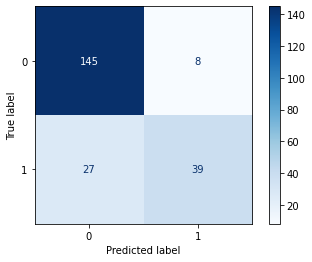

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier


# get X and y
df_X = X_input_wordvec
df_y = df_resize['airline_sentiment']

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)

#mulai learning 
model=MLPClassifier(max_iter=1000, random_state=42)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Future works
- Dalam codes diatas, preprocessing (tokenization, removing stopwords, stemming/ lemmatization) dikerjakan terlebih dahulu, kemudian baru data di-split menjadi 2, training dan testing
- Codes diatas bisa diperbaiki dengan cara, dataset di-split dahulu menjadi training dan testing, baru kemudian preprocessing dikerjakan terhadap data training dan testing
- Atau bisa menggunakan Pipeline